In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#data collection and processing
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('D:\python_but_machine_learning\gld_price_data.csv')

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Asus\AppData\Local\Temp\ipykernel_34348\133384206.py:3: SyntaxWarning: invalid escape sequence '\p'
  gold_data = pd.read_csv('D:\python_but_machine_learning\gld_price_data.csv')


In [4]:
#print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
#correlation:   1: positive correlation     2: negative correlation
# Convert the 'Date' column to datetime format (if applicable)
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Drop non-numeric columns
numeric_data = gold_data.select_dtypes(include=['number'])

# Calculate the correlation only on numeric columns
correlation = numeric_data.corr()

print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

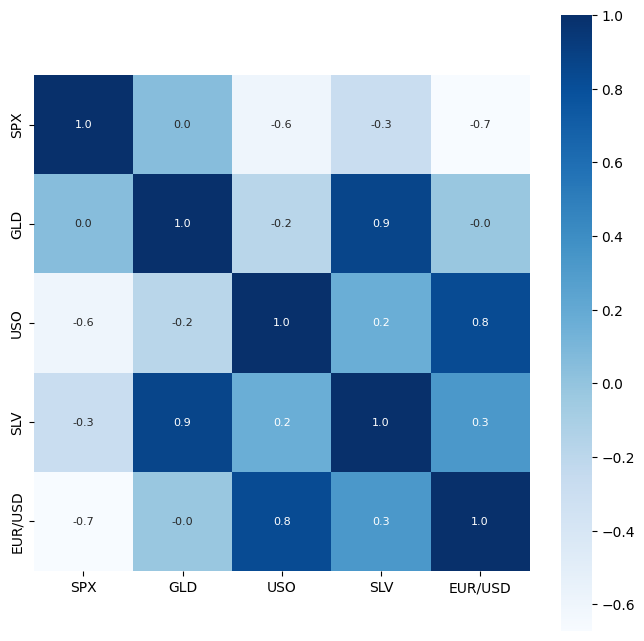

In [13]:
#constructructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [14]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


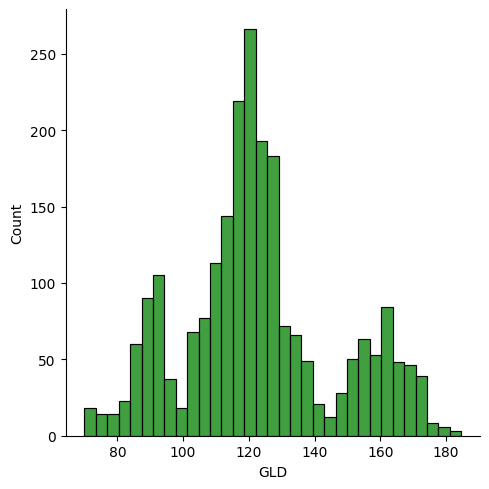

In [16]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color = 'green')

In [17]:
#splitting the features and target
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
#splittig into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [22]:
#model training: random forest regressor
regressor = RandomForestRegressor()

In [23]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [24]:
#model evaluation
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.61379933  81.98930002 116.15929976 127.81720066 120.71000169
 154.61979766 150.30289821 126.17089987 117.55949888 125.89050073
 116.70400112 171.86880049 141.07459843 167.86079845 115.05419994
 117.26140019 138.66760317 170.18880091 159.25570318 157.58219899
 155.18610022 125.33160006 175.94169994 157.38270341 125.32400039
  93.75319931  77.12830045 120.06979987 119.15149969 167.30740019
  88.00560037 125.21570006  91.08450044 117.83060021 121.13199869
 136.32899998 115.44090155 114.98020086 146.53549957 107.30980079
 104.25600239  87.05819776 126.52110059 118.00550002 154.65469898
 119.59879998 108.40650027 108.04459827  93.08530046 127.15369768
  75.12050008 113.66759934 121.1868003  111.25149937 118.85909895
 120.55829955 158.25920052 167.37940139 147.11519698  85.98499856
  94.50020058  86.82629874  90.41590016 118.98910038 126.39030065
 127.60649951 169.03200005 122.24109922 117.43329887  98.36380068
 168.69790135 143.0969982  132.03380203 121.18950203 121.5550997
 119.835600

In [26]:
#R squarred error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squarred error: ', error_score)

R squarred error:  0.9899957156045157


In [27]:
#compare the actual values and predicted values in a plot
Y_test = list(Y_test)

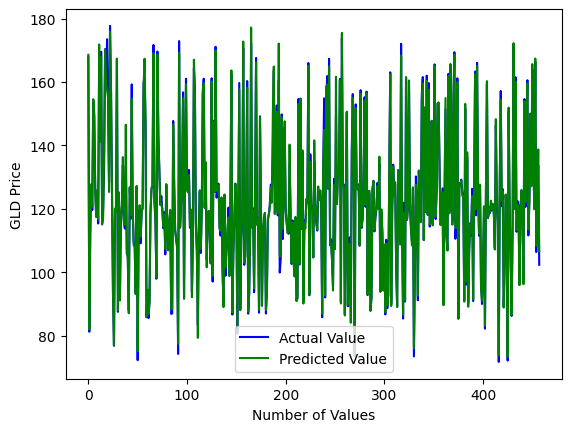

In [28]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()